In [213]:
import numpy as np
import pandas as pd
from sklearn.decomposition import FactorAnalysis
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump, load


df = pd.read_csv('data/network_activations_small_20000_trials.csv')


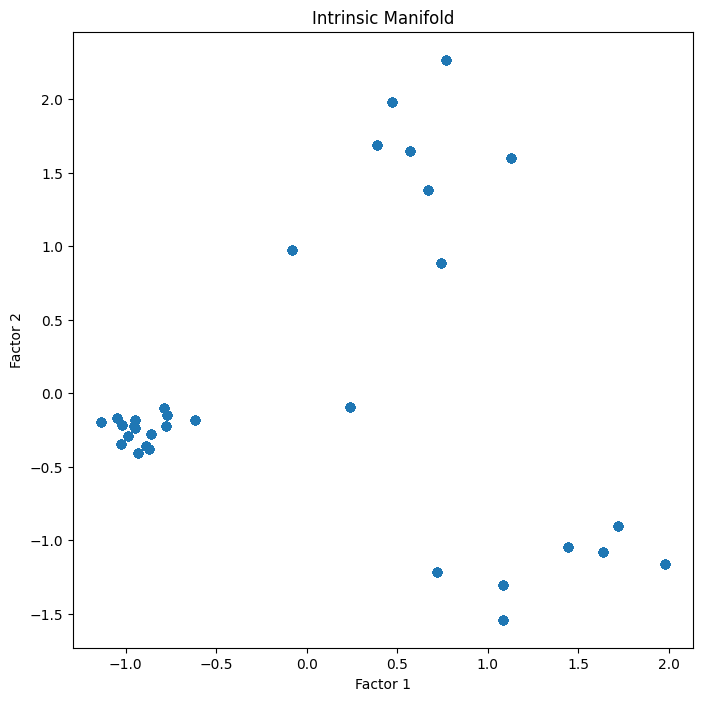

In [214]:
n_factors = 6
fa = FactorAnalysis(n_components=n_factors,rotation='varimax')
manifold = fa.fit_transform(df)
dump(fa, 'fa_model.joblib')
factor_scores = manifold

# Create a scatter plot of the first two factors
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(manifold[:, 0], manifold[:, 1], alpha=0.05)
ax.set_xlabel('Factor 1')
ax.set_ylabel('Factor 2')
ax.set_title('Intrinsic Manifold')
plt.show()

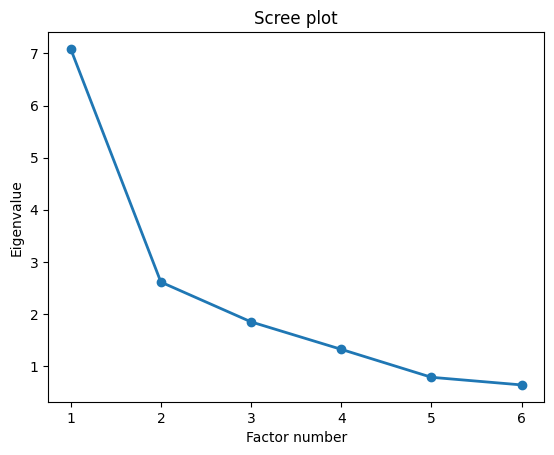

In [215]:
factor_loadings = fa.components_
eigenvalues = np.linalg.eigvals(factor_loadings.dot(factor_loadings.T))

sorted_eigenvalues = np.sort(eigenvalues)[::-1]

# Plot the eigenvalues against the factor number
plt.plot(np.arange(1, n_factors+1), sorted_eigenvalues, 'o-', linewidth=2)
plt.xlabel('Factor number')
plt.ylabel('Eigenvalue')
plt.title('Scree plot')
plt.show()

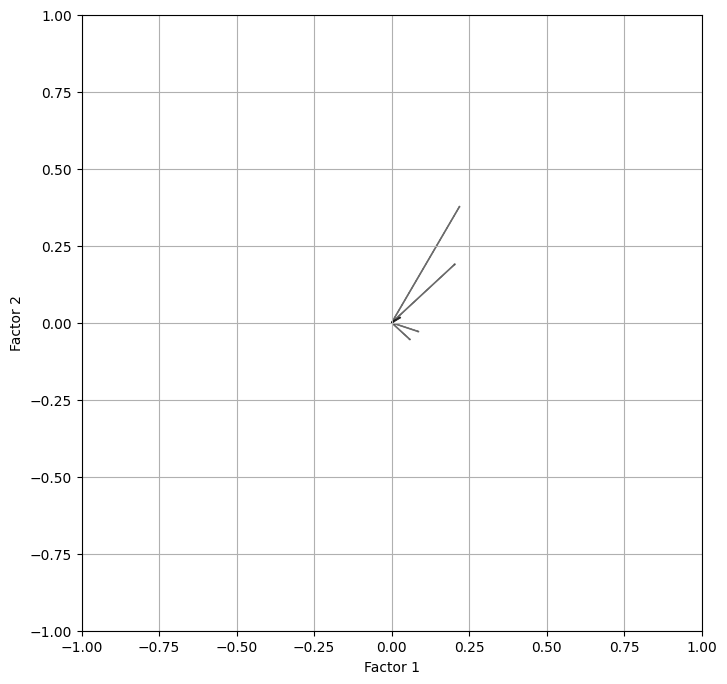

In [216]:
loadings = fa.components_
var_names = df.columns.values.tolist()

# Create biplot
fig, ax = plt.subplots(figsize=(8, 8))

for i in range(len(eigenvalues)):
    ax.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='black', alpha=0.5)
    #ax.text(loadings[i, 0]*1.2, loadings[i, 1]*1.2, var_names[i], color='black')

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_xlabel('Factor 1')
ax.set_ylabel('Factor 2')
ax.grid(True)

plt.show()

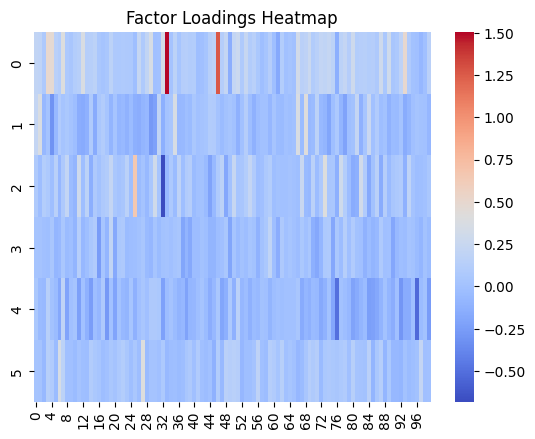

In [217]:
sns.heatmap(loadings, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Factor Loadings Heatmap')
plt.show()

/home/kevin/miniconda3/envs/gym/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


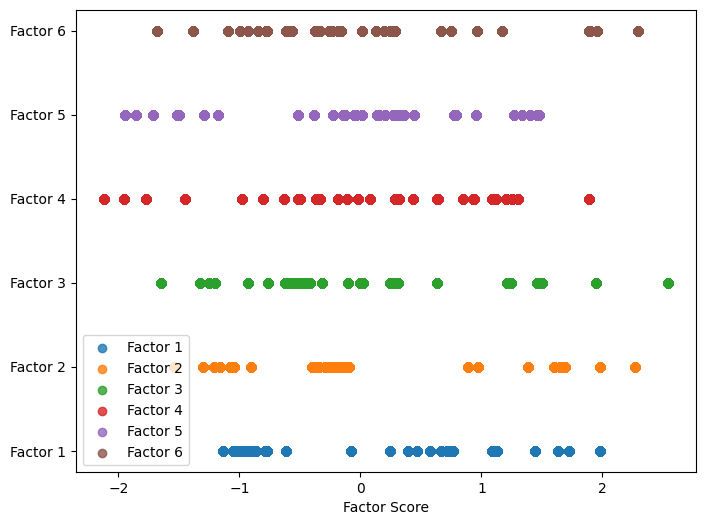

In [218]:
# Plot the factor scores as a scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(n_factors):
    ax.scatter(factor_scores[:, i], [i] * len(factor_scores), alpha=0.8, label=f"Factor {i+1}")
ax.legend()
ax.set_xlabel("Factor Score")
ax.set_yticks(range(n_factors))
ax.set_yticklabels([f"Factor {i+1}" for i in range(n_factors)])
plt.show()

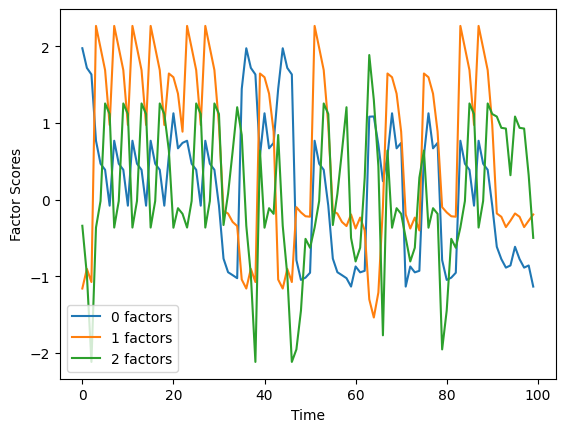

In [219]:
x_factors = factor_scores[:, 0]
y_factors = factor_scores[:, 1]
z_factors = factor_scores[:, 3]

# Create a time vector
time = range(factor_scores.shape[0])  # replace 'num_samples' with the actual number of samples

# Plot the factor scores against time
plt.plot(time[:100], x_factors[:100], label='0 factors')
plt.plot(time[:100], y_factors[:100], label='1 factors')
plt.plot(time[:100], z_factors[:100], label='2 factors')
plt.xlabel('Time')
plt.ylabel('Factor Scores')
plt.legend()
plt.show()

There are 0 NaN values in the DataFrame.
0.000000000000000000e+00       0.269025
0.000000000000000000e+00.1     0.268526
0.000000000000000000e+00.2     0.087740
5.728458166122436523e-01       0.728325
0.000000000000000000e+00.3     0.371764
                                 ...   
0.000000000000000000e+00.37    0.009671
1.171836614608764648e+00       1.038236
9.917341470718383789e-01       0.169473
0.000000000000000000e+00.38    0.007845
6.766827106475830078e-01       0.557272
Length: 100, dtype: float64
There are 63998 NaN values in the DataFrame.


/tmp/ipykernel_46722/1468606987.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.columns, rotation=90)


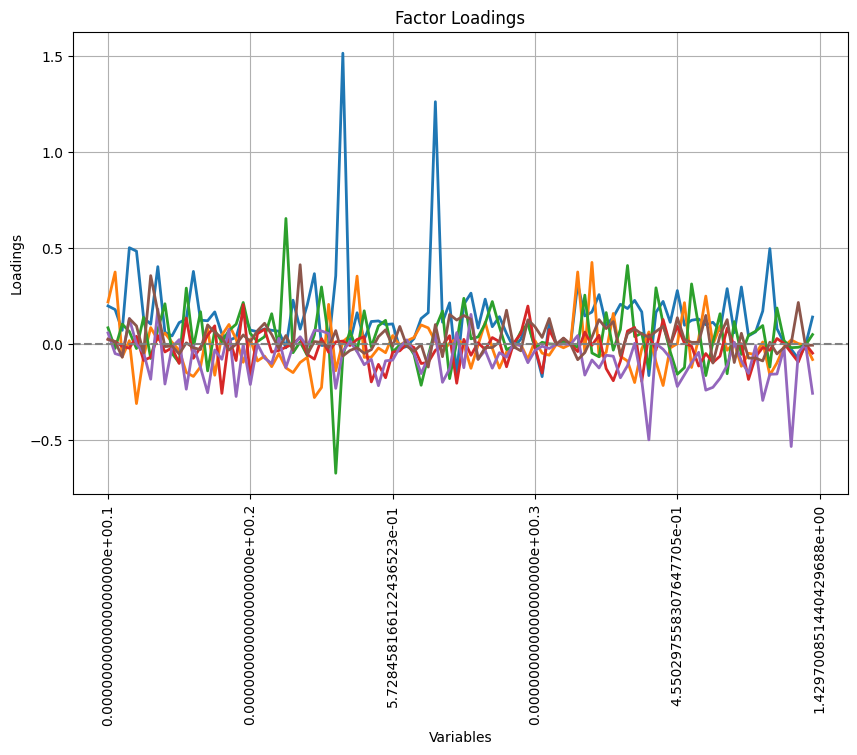

In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis

# Load data
df = pd.read_csv('data/network_activations_small_5000_trials.csv')
nan_count = df.isna().sum().sum()

print(f'There are {nan_count} NaN values in the DataFrame.')
print(df.mean())
# Scale the data
df_scaled = (df - df.mean()) / df.std()
nan_count = df_scaled.isna().sum().sum()

print(f'There are {nan_count} NaN values in the DataFrame.')
# Run factor analysis
n_factors = 6
fa = FactorAnalysis(n_components=n_factors, rotation='varimax')
fa.fit(df)

# Get factor loadings
loadings = fa.components_.T

# Plot factor loadings
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(loadings, linewidth=2)
ax.axhline(y=0, color='gray', linestyle='--')
#ax.set_xticks(np.arange(df.shape[1]))
ax.set_xticklabels(df.columns, rotation=90)
ax.set_title('Factor Loadings')
ax.set_xlabel('Variables')
ax.set_ylabel('Loadings')
ax.grid(True)
plt.show()

[[-7.20323352e-01 -7.46166773e-02]
 [-4.96287610e-01 -1.16263250e-02]
 [ 9.68369216e-01  5.72539892e-01]
 [ 1.26841077e+00  1.36872613e+00]
 [ 9.64641498e-01  2.04332676e-01]
 [-5.28073146e-01  2.44074561e-01]
 [ 9.56558954e-01  9.66385524e-01]
 [-3.49867399e-01  1.76957182e+00]
 [ 6.90103562e-01 -1.25655659e+00]
 [-1.89657183e+00  1.67270708e+00]
 [ 5.97045794e-01 -5.22273627e-02]
 [ 5.66325622e-01 -6.69309759e-01]
 [-5.19556743e-02 -6.42043368e-01]
 [-6.04968709e-01  2.55405121e-01]
 [-1.27045541e+00 -7.13092641e-02]
 [-6.85801831e-01  2.20345584e+00]
 [-9.32110865e-03 -1.32015031e+00]
 [-6.62717055e-02  1.34207012e+00]
 [-2.44040021e-01 -4.36043961e-01]
 [ 1.31032983e-01 -7.48580289e-02]
 [ 8.30604519e-01 -1.41937319e+00]
 [-2.83668316e-01  2.46101410e-01]
 [-8.06428605e-01  7.86196584e-01]
 [-1.75615705e+00 -1.25817579e+00]
 [-1.03607357e+00 -1.46389167e-01]
 [-2.59996848e-01  1.02689196e+00]
 [-4.03031950e-01 -3.71264695e-03]
 [ 2.13491344e-01  1.92733402e+00]
 [ 1.46165239e+00  3

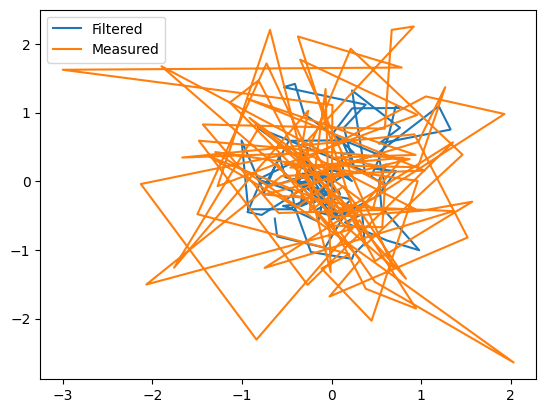

In [221]:
from filterpy.kalman import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt

# Define the Kalman filter
kf = KalmanFilter(dim_x=6, dim_z=2)

# Define the state transition matrix
dt = 0.1
F = np.array([[1, 0, dt, 0, 0.5*dt**2, 0],
              [0, 1, 0, dt, 0, 0.5*dt**2],
              [0, 0, 1, 0, dt, 0],
              [0, 0, 0, 1, 0, dt],
              [0, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 1]])
kf.F = F

# Define the observation matrix
H = np.array([[1, 0, 0, 0, 0, 0],
              [0, 1, 0, 0, 0, 0]])
kf.H = H

# Define the process noise covariance matrix
Q = np.diag([0.01, 0.01, 0.1, 0.1, 0.01, 0.01])
kf.Q = Q

# Define the measurement noise covariance matrix
R = np.diag([1, 1])
kf.R = R

# Define the initial state
x0 = np.array([0, 0, 0, 0, 0, 0])
P0 = np.eye(6) * 100
kf.x = x0
kf.P = P0

# Generate some random measurements
n_samples = 100
measurements = np.random.normal(loc=0, scale=1, size=(n_samples, 2))
print(measurements)

# Run the Kalman filter
filtered_states = []
for measurement in measurements:
    kf.predict()
    kf.update(measurement.reshape(2, 1))
    filtered_states.append(kf.x)

# Convert the filtered states list to a numpy array
filtered_states = np.array(filtered_states)

# Plot the results
plt.plot(filtered_states[:, 0], filtered_states[:, 1], label='Filtered')
plt.plot(measurements[:, 0], measurements[:, 1], label='Measured')
plt.legend()
plt.show()

In [222]:
import numpy as np
from filterpy.kalman import KalmanFilter

# define Kalman filter
kf = KalmanFilter(dim_x=6, dim_z=2)

# define state transition matrix
A = np.array([[1., 0., 1., 0., 0.5, 0.],
              [0., 1., 0., 1., 0., 0.5],
              [0., 0., 1., 0., 1., 0.],
              [0., 0., 0., 1., 0., 1.],
              [0., 0., 0., 0., 1., 0.],
              [0., 0., 0., 0., 0., 1.]])

kf.F = A

# define observation matrix
H = np.array([[1., 0., 0., 0., 0., 0.],
              [0., 1., 0., 0., 0., 0.]])

kf.H = H

# define measurement noise covariance matrix
R = np.array([[0.1, 0.],
              [0., 0.1]])

kf.R = R

# define initial state vector
x = np.array([[0., 0., 0., 0., 0., 0.]]).T

kf.x = x

# define initial state covariance matrix
P = np.array([[1., 0., 0., 0., 0., 0.],
              [0., 1., 0., 0., 0., 0.],
              [0., 0., 1., 0., 0., 0.],
              [0., 0., 0., 1., 0., 0.],
              [0., 0., 0., 0., 1., 0.],
              [0., 0., 0., 0., 0., 1.]])

kf.P = P

# define control input
u = np.array([[0., 0., 0., 0., 0., 0.]]).T

# update the Kalman filter with new measurements
z = np.array([[2., 1.]]).T
kf.predict(u=u)
kf.update(z)

# retrieve the updated state estimate
x = kf.x

print(x)

[[1.94029851]
 [0.97014925]
 [0.89552239]
 [0.44776119]
 [0.29850746]
 [0.14925373]]


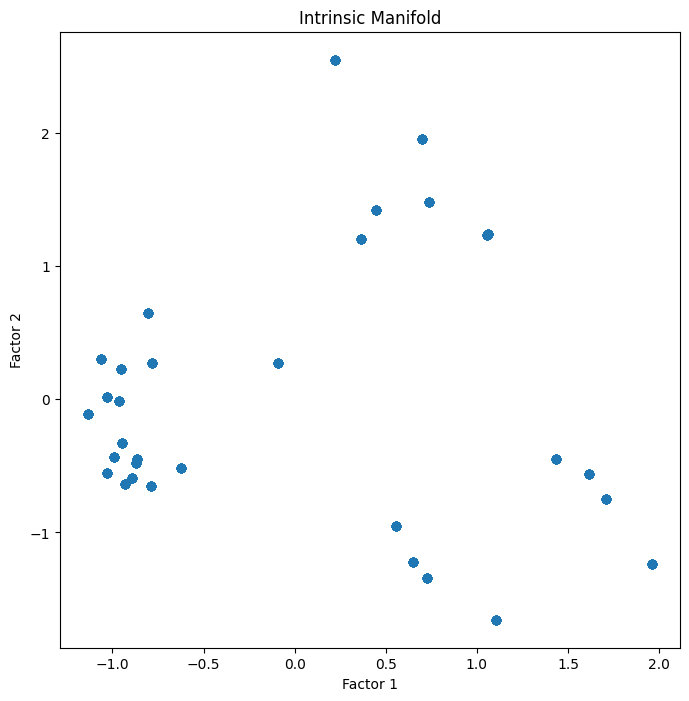

/home/kevin/miniconda3/envs/gym/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/home/kevin/miniconda3/envs/gym/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


[[ 0.   0.  -1. ]
 [ 0.   1.  -1. ]
 [ 0.   2.  -1. ]
 [ 0.   3.   0.8]
 [ 0.   4.  -0.4]
 [ 0.   5.  -0.8]
 [ 1.   0.   0. ]
 [ 1.   1.   0. ]
 [ 1.   2.   0. ]
 [ 1.   3.   0. ]
 [ 1.   4.   0. ]
 [ 1.   5.   0. ]]


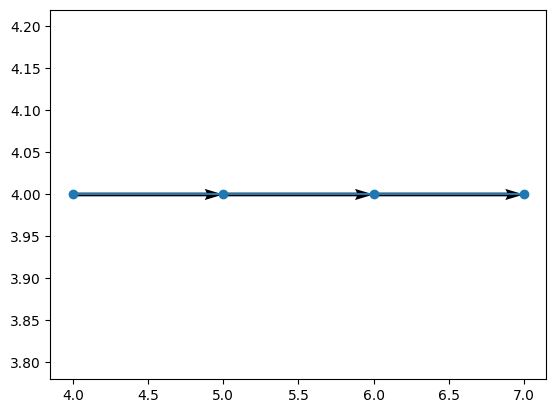

[[ 0.          0.         -0.89442719]
 [ 0.          1.         -0.89442719]
 [ 0.          2.          0.4472136 ]
 [ 0.          3.         -0.89442719]
 [ 0.          4.         -0.4472136 ]
 [ 0.          5.         -0.89442719]
 [ 1.          0.         -0.63245553]
 [ 1.          1.         -0.63245553]
 [ 1.          2.          0.31622777]
 [ 1.          3.         -0.9486833 ]
 [ 1.          4.         -0.9486833 ]
 [ 1.          5.         -0.63245553]]


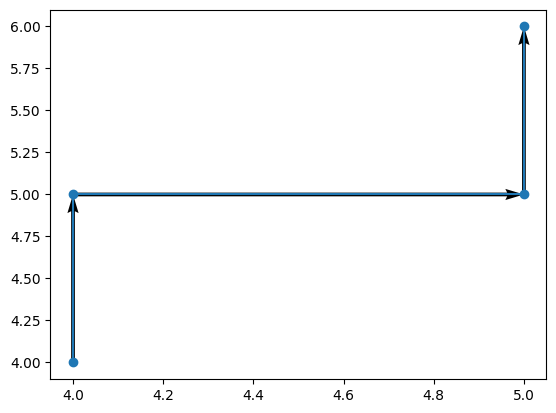

[[ 0.   0.   0. ]
 [ 0.   1.   0. ]
 [ 0.   2.   0. ]
 [ 0.   3.   0. ]
 [ 0.   4.   0. ]
 [ 0.   5.   0. ]
 [ 1.   0.   0.2]
 [ 1.   1.   1. ]
 [ 1.   2.   1. ]
 [ 1.   3.  -0.8]
 [ 1.   4.  -0.8]
 [ 1.   5.   0.8]]


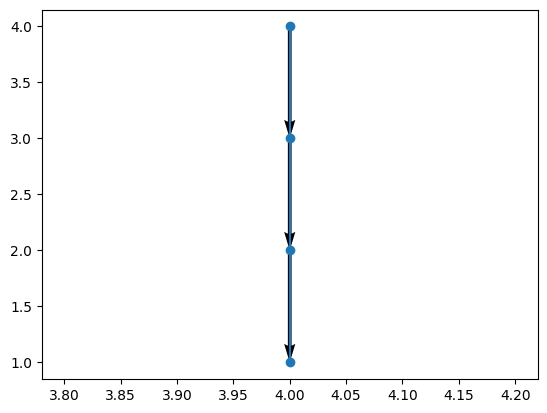

[[ 0.          0.         -0.63245553]
 [ 0.          1.          0.9486833 ]
 [ 0.          2.          0.9486833 ]
 [ 0.          3.         -0.31622777]
 [ 0.          4.         -0.9486833 ]
 [ 0.          5.          0.9486833 ]
 [ 1.          0.          0.        ]
 [ 1.          1.          0.4472136 ]
 [ 1.          2.          0.4472136 ]
 [ 1.          3.         -0.4472136 ]
 [ 1.          4.         -0.89442719]
 [ 1.          5.          0.89442719]]


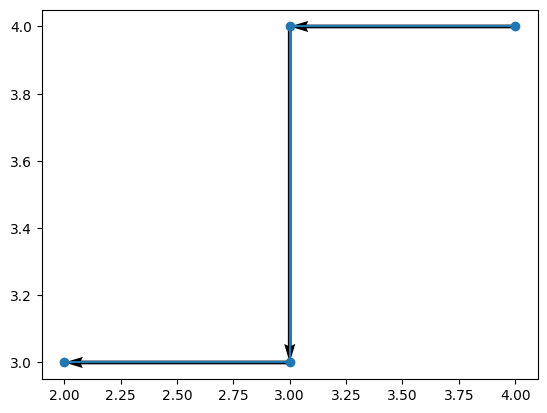

[[ 0.   0.   0. ]
 [ 0.   1.   0. ]
 [ 0.   2.   0. ]
 [ 0.   3.   0. ]
 [ 0.   4.   0. ]
 [ 0.   5.   0. ]
 [ 1.   0.  -0.8]
 [ 1.   1.   0.8]
 [ 1.   2.   1. ]
 [ 1.   3.  -1. ]
 [ 1.   4.  -0.8]
 [ 1.   5.  -0.8]]


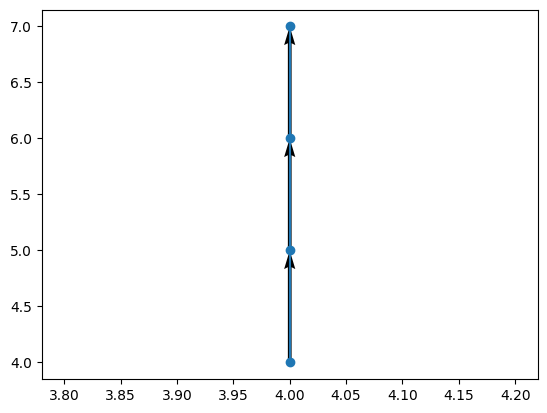

[[ 0.          0.         -0.89442719]
 [ 0.          1.         -0.89442719]
 [ 0.          2.          0.4472136 ]
 [ 0.          3.         -0.89442719]
 [ 0.          4.         -0.4472136 ]
 [ 0.          5.         -0.89442719]
 [ 1.          0.         -0.63245553]
 [ 1.          1.         -0.63245553]
 [ 1.          2.          0.31622777]
 [ 1.          3.         -0.9486833 ]
 [ 1.          4.         -0.9486833 ]
 [ 1.          5.         -0.63245553]]


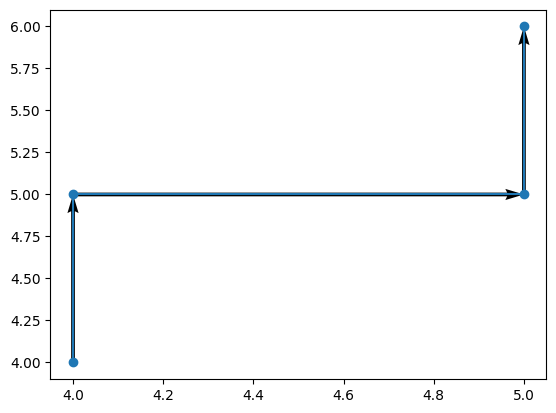

[[ 0.   0.  -0.4]
 [ 0.   1.   1. ]
 [ 0.   2.   0.4]
 [ 0.   3.   0.4]
 [ 0.   4.  -1. ]
 [ 0.   5.   0.8]
 [ 1.   0.   0. ]
 [ 1.   1.   0. ]
 [ 1.   2.   0. ]
 [ 1.   3.   0. ]
 [ 1.   4.   0. ]
 [ 1.   5.   0. ]]


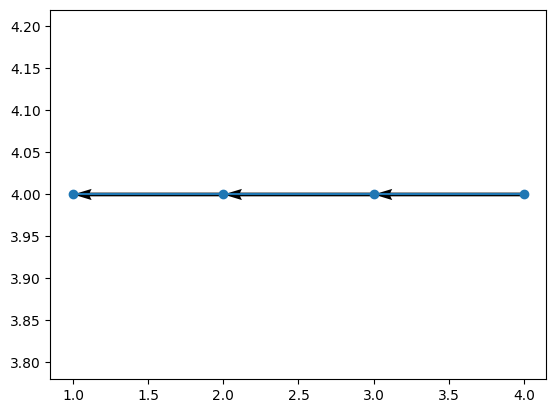

In [223]:
from scipy.stats import pearsonr, spearmanr


pos = np.loadtxt('positions.csv', delimiter=',')
factors = np.loadtxt('factors.csv', delimiter=',')
# Create a scatter plot of the first two factors
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(factors[:, 0], factors[:, 2], alpha=0.05)
ax.set_xlabel('Factor 1')
ax.set_ylabel('Factor 2')
ax.set_title('Intrinsic Manifold')
plt.show()
# Extract test IDs and positions
test_ids = pos[:, 0]
positions = pos[:, 1:]

# Group positions by test ID
pos_groups = {}
factors_groups = {}
for test_id in np.unique(test_ids):
    idx = np.where(test_ids == test_id)
    test_positions = positions[idx]
    test_factors = factors[idx]
    pos_groups[test_id] = test_positions
    factors_groups[test_id] = test_factors

# Calculate velocity and speed for each test
vel_groups = {}
speed_groups = {}
for test_id, pos_group in pos_groups.items():
    vel_group = np.diff(pos_group, axis=0)
    vel_groups[test_id] = vel_group
    speed_groups[test_id] = np.linalg.norm(vel_group, axis=1)

# Calculate movement directions for each test
dir_groups = {}
for test_id, vel_group in vel_groups.items():
    x_direction = np.where(vel_group[:,0]>0, 'right', 'left')
    y_direction = np.where(vel_group[:,1]>0, 'north', 'south')
    dir_groups[test_id] = [f'{x}_{y}' for x, y in zip(x_direction, y_direction)]


def plot_trajectory(pos):
    fig, ax = plt.subplots()
    ax.plot(pos[:, 0], pos[:, 1], '-o')
    dx = np.diff(pos[:, 0])
    dy = np.diff(pos[:, 1])
    arrow_x = pos[:-1, 0]
    arrow_y = pos[:-1, 1]
    arrow_dx = dx
    arrow_dy = dy
    ax.quiver(arrow_x, arrow_y, arrow_dx, arrow_dy, angles='xy', scale_units='xy', scale=1)
    plt.show()

spearman_corr = {}
pearson_corr = {}

for test_id in np.unique(test_ids):
    pos_group = pos_groups[test_id]
    factor_group = factors_groups[test_id]
    test_pearson = []
    test_spearman = []
    for i in range(2):  # loop through x and y position coordinates
        pos_coord = pos_group[:, i]
        for j in range(6):  # loop through factors 0-5
            factor_coord = factor_group[:, j]
            pos_factor_pearson, p_val_pearson = pearsonr(pos_coord, factor_coord)
            pos_factor_spearman, p_val_spearman = spearmanr(pos_coord, factor_coord)
            if np.isnan(pos_factor_pearson):
                pos_factor_pearson = 0.0
            if np.isnan(pos_factor_spearman):
                pos_factor_spearman = 0.0
            test_pearson.append([i, j, pos_factor_pearson])
            test_spearman.append([i, j, pos_factor_spearman])
        
    spearman_corr[test_id] = np.array(test_spearman)
    pearson_corr[test_id] = np.array(test_pearson)

for i in range(1,8):  
    print(spearman_corr[i])
    plot_trajectory(pos_groups[i])



{1.0: array([0, 1, 2, 3]), 2.0: array([4, 5, 6, 7]), 3.0: array([ 8,  9, 10, 11]), 4.0: array([12, 13, 14, 15]), 5.0: array([16, 17, 18, 19]), 6.0: array([20, 21, 22, 23]), 7.0: array([24, 25, 26, 27]), 8.0: array([28, 29, 30, 31]), 9.0: array([32, 33, 34, 35]), 10.0: array([36, 37, 38, 39]), 11.0: array([40, 41, 42, 43]), 12.0: array([44, 45, 46, 47]), 13.0: array([48, 49, 50, 51]), 14.0: array([52, 53, 54, 55]), 15.0: array([56, 57, 58, 59]), 16.0: array([60, 61, 62, 63]), 17.0: array([64, 65, 66, 67]), 18.0: array([68, 69, 70, 71]), 19.0: array([72, 73, 74, 75]), 20.0: array([76, 77, 78, 79]), 21.0: array([80, 81, 82, 83]), 22.0: array([84, 85, 86, 87]), 23.0: array([88, 89, 90, 91]), 24.0: array([92, 93, 94, 95]), 25.0: array([96, 97, 98, 99]), 26.0: array([100, 101, 102, 103]), 27.0: array([104, 105, 106, 107]), 28.0: array([108, 109, 110, 111]), 29.0: array([112, 113, 114, 115]), 30.0: array([116, 117, 118, 119]), 31.0: array([120, 121, 122, 123]), 32.0: array([124, 125, 126, 127

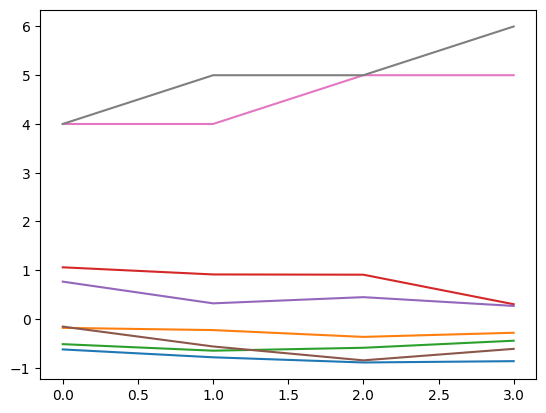

In [210]:
# Combine the x and y directions into a single 'movement' label
movement = np.char.add(x_direction, y_direction)

# get unique values of first column (it)
unique_it = np.unique(pos[:, 0])

# create dictionary to store indices for each group
groups = {}
for it in unique_it:
    # get boolean mask for current group
    mask = pos[:, 0] == it
    # store indices for current group in dictionary
    groups[it] = np.where(mask)[0]

# example of accessing indices for group with it=1
print(groups)
group_indices = groups[30]
example_pos = pos[group_indices]
example_factor = factors[group_indices]
print(example_pos)

# assume pos is an array of shape (n, 2) containing x, y coordinates
pos = example_pos[:,1:]


plt.plot(example_factor)
plt.plot(pos[:, 0])
plt.plot(pos[:, 1])
print(example_factor)
plt.show()

In [239]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
import pickle
from sklearn.neural_network import MLPRegressor


# Load the data
X = np.loadtxt('factors.csv', delimiter=',') # input variables after factor analysis
y = np.loadtxt('positions.csv', delimiter=',') # go cue positions

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y[:,1], test_size=0.5, random_state=42)

# Train a perceptron model for x position
model_action = MLPRegressor(hidden_layer_sizes=(50, 50), activation='relu', max_iter=1000)
model_action.fit(X_train, y_train)
with open('perceptron_model_action.pkl', 'wb') as file:
    pickle.dump(model_action, file)

# Evaluate the model on the testing set
score_x = model_action.score(X_test, y_test)
print('Model score (x position):', score_x)



# Use the models to predict the next position of the go cue for a new input
new_input = np.array([0.5, 0.2, 0.8, 0.1, 0.9, 0.3]) # example input
predicted_action = model_action.predict([new_input])

print('Predicted position (x, y):', predicted_action)


Model score (x position): 0.876
Predicted position (x, y): [1.]


In [240]:
# Use the model to predict the go cue positions for the test inputs
x_pred = model_action.predict(X_test)

# Calculate the mean squared error between the predicted and actual go cue positions
mse = ((x_pred - y_test) ** 2).mean()
print('Mean squared error:', mse)

Mean squared error: 0.3816
